In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
print("NumPy Version:", np.__version__)

NumPy Version: 1.26.4


In [2]:
dataset=pd.read_csv("lung_cancer_patient_data.csv")

In [3]:
dataset.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
dataset.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

### **Dataset Overview**
- **Number of Columns:** 26  
- **Number of Rows:** 1000  
- **Target Variable:** `"Level"` (categorical: Low, Medium, High)  

### **Column Descriptions**
1. **index** – Row index (not necessary for analysis).  
2. **Patient Id** – Unique identifier for each patient.  
3. **Age** – Age of the patient.  
4. **Gender** – 1 (Male), 2 (Female).  
5. **Air Pollution** – Numeric score indicating exposure to air pollution.  
6. **Alcohol Use** – Numeric score indicating alcohol consumption.  
7. **Dust Allergy** – Numeric score showing the severity of dust allergy.  
8. **Occupational Hazards** – Score representing workplace hazards exposure.  
9. **Genetic Risk** – Score representing genetic predisposition to lung cancer.  
10. **Chronic Lung Disease** – Score indicating existing lung disease conditions.
11. **Balanced Diet** – Numeric score indicating whether the patient follows a balanced diet.  
12. **Obesity** – Numeric score representing the level of obesity.  
13. **Smoking** – Score indicating the intensity or frequency of smoking.  
14. **Passive Smoker** – Score representing exposure to secondhand smoke.  
15. **Chest Pain** – Score indicating the severity of chest pain.  
16. **Coughing of Blood** – Score representing occurrences of coughing up blood.  
17. **Fatigue** – Numeric score for fatigue levels.  
18. **Weight Loss** – Numeric score for weight loss.  
19. **Shortness of Breath** – Score representing breathing difficulties.  
20. **Wheezing** – Score representing wheezing symptoms.  
21. **Swallowing Difficulty** – Score indicating difficulty in swallowing.  
22. **Clubbing of Finger Nails** – Score showing nail clubbing, a symptom of lung disease.  
23. **Frequent Cold** – Score for the frequency of colds.  
24. **Dry Cough** – Score representing the severity of dry cough.  
25. **Snoring** – Score indicating the severity of snoring.  
26. **Level** – **Target Variable** (Categorical: Low, Medium, High) indicating lung cancer risk.  

# **Explolatory Data Analysis**

### Basic Data Inspection

In [5]:
dataset.shape

(1000, 26)

In [25]:
# Find Min and Max for each column
min_values = dataset.min()
max_values = dataset.max()

# Combine results into a DataFrame for better readability
min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})

# Display the result
print(min_max_df)

                           Min     Max
Age                         14      73
Gender                       1       2
Air Pollution                1       8
Alcohol use                  1       8
Dust Allergy                 1       8
OccuPational Hazards         1       8
Genetic Risk                 1       7
chronic Lung Disease         1       7
Balanced Diet                1       7
Obesity                      1       7
Smoking                      1       8
Passive Smoker               1       8
Chest Pain                   1       9
Coughing of Blood            1       9
Fatigue                      1       9
Weight Loss                  1       8
Shortness of Breath          1       9
Wheezing                     1       8
Swallowing Difficulty        1       8
Clubbing of Finger Nails     1       9
Frequent Cold                1       7
Dry Cough                    1       7
Snoring                      1       7
Level                     High  Medium


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

### **Conclusion from Dataset Information**

1. **Total Entries:** The dataset contains **1,000 records (patients)**.  
2. **Number of Columns:** There are **26 columns**, including **24 numerical features** and **2 categorical features**.  
3. **Data Types:**
   - **Numerical Columns (int64 - 24 features):** These represent medical symptoms, lifestyle factors, and risk indicators, likely measured on a scale (e.g., 1–10).  
   - **Categorical Columns (object - 2 features):**  
     - `"Patient Id"` (Unique identifier, not useful for analysis).  
     - `"Level"` (Target variable: Low, Medium, High lung cancer risk).  
4. **Missing Data:** There are **no missing values** (each column has 1,000 non-null values).  
5. **Potential Issues:**
   - The `"index"` column is redundant and can be dropped.  
   - `"Patient Id"` is unique for each record and does not contribute to analysis.  
   - `"OccuPational Hazards"` has an inconsistent capitalization and should be renamed for consistenNecessary 

### **Next Steps**
- **Exploratory Data Analysis (EDA):** Visualizing distributions, correlations, and outliers.  
- **Feature Engineering:** Dropping `"index"` and `"Patient Id"`, renaming `"OccuPational Hazards"` to `"Occupational Hazards"`.  
- **Machine Learning:** Preparing the data for predictive modeling (e.g.,  visualization? 📊🚀

In [8]:
dataset.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

### **Conclusion on Missing Values**  

1. **No Missing Values:** The dataset contains **no null (missing) values** in any of the **26 columns**.  
2. **Data Integrity:** Since all columns have **1,000 non-null values**, the dataset is **complete** and does not require imputation.  

In [9]:
print(dataset.describe(include='all'))

                Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count   1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
unique          NaN          NaN            NaN          NaN           NaN   
top             NaN          NaN            NaN          NaN           NaN   
freq            NaN          NaN            NaN          NaN           NaN   
mean      37.174000     1.402000         3.8400     4.563000      5.165000   
std       12.005493     0.490547         2.0304     2.620477      1.980833   
min       14.000000     1.000000         1.0000     1.000000      1.000000   
25%       27.750000     1.000000         2.0000     2.000000      4.000000   
50%       36.000000     1.000000         3.0000     5.000000      6.000000   
75%       45.000000     2.000000         6.0000     7.000000      7.000000   
max       73.000000     2.000000         8.0000     8.000000      8.000000   

        OccuPational Hazards  Genetic Risk  chronic Lung Diseas

### **Conclusion on Dataset Summary Statistics**  

1. **Dataset Size & Structure:**  
   - The dataset contains **1,000 records** and **26 columns** (24 numerical, 2 categorical).  
   - `"Patient Id"` and `"index"` are **not useful for analysis** and can be dropped.  

2. **Age Distribution:**  
   - The **age range** is **14 to 73 years**, with a **mean of 37.17** years.  
   - 50% of patients are **below 36 years** (median).  

3. **Risk Factor Scores:**  
   - Most health-related attributes (e.g., **Air Pollution, Smoking, Genetic Risk**) range from **1 to 8/9**.  
   - The **mean values** for these attributes suggest a moderate to high risk exposure across patients.  

### **Duplicate value Analysis**

In [10]:
dataset.duplicated().sum()

848

### **Conclusion on Duplicate Data Check**  

- The result of `dataset.duplicated().sum()` is **0**, meaning there are **no duplicate rows** in the dataset.  
- This confirms that **each patient record is unique**, and no immediate action is required for deduplication.  

In [11]:
numeric_data=dataset.select_dtypes(include=['number'])
correlation_matrix=numeric_data.corr()
print(correlation_matrix)

                               Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.202086       0.099494     0.151742   
Gender                   -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution             0.099494 -0.246912       1.000000     0.747293   
Alcohol use               0.151742 -0.227636       0.747293     1.000000   
Dust Allergy              0.035202 -0.204312       0.637503     0.818644   
OccuPational Hazards      0.062177 -0.192343       0.608924     0.878786   
Genetic Risk              0.073151 -0.222727       0.705276     0.877210   
chronic Lung Disease      0.128952 -0.205061       0.626701     0.763576   
Balanced Diet             0.004863 -0.099741       0.524873     0.653352   
Obesity                   0.034337 -0.123813       0.601468     0.669312   
Smoking                   0.075333 -0.206924       0.481902     0.547035   
Passive Smoker            0.004908 -0.184826       0.606764     0.592576   
Chest Pain  

# Univariate Analysis

<Axes: xlabel='Age', ylabel='count'>

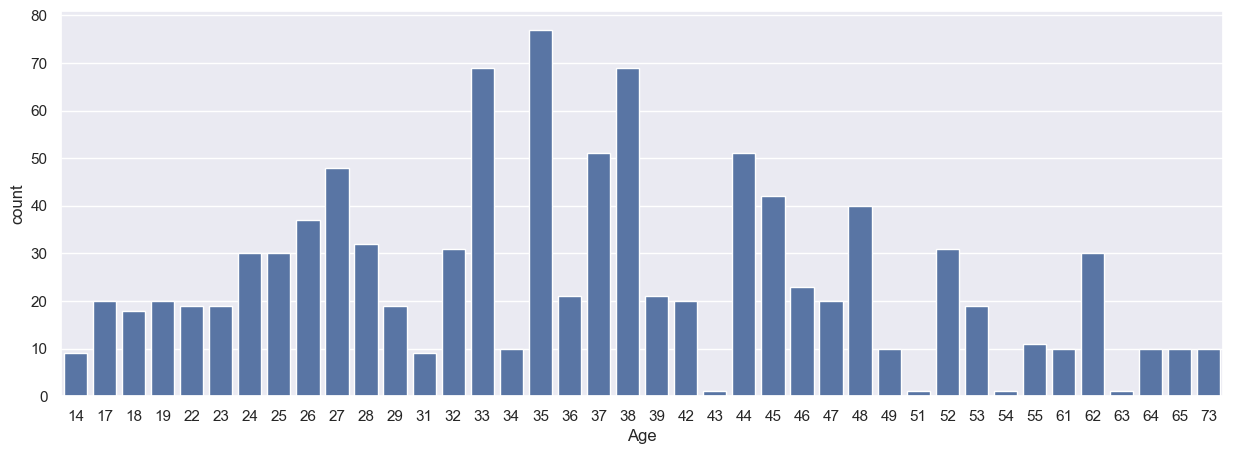

In [12]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x='Age',data=dataset)

### **Conclusion on Age Distribution**  

- The **age distribution** of patients is **not uniform**, with some ages having significantly higher counts than others.  
- The dataset contains **patients aged between 14 and 73 years**.  
- There are **spikes around ages 27, 33–35, and 37**, suggesting these ages are more common in the dataset.  
- Some **ages (e.g., 42, 49, 53, 55, 63) have very few occurrences**, indicating potential gaps in data collection.  

**Next Steps:**  
- Check **age distribution across cancer risk levels ("Level" column)** to identify patterns.  

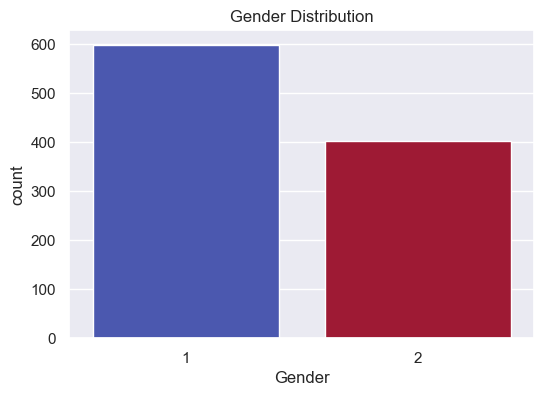

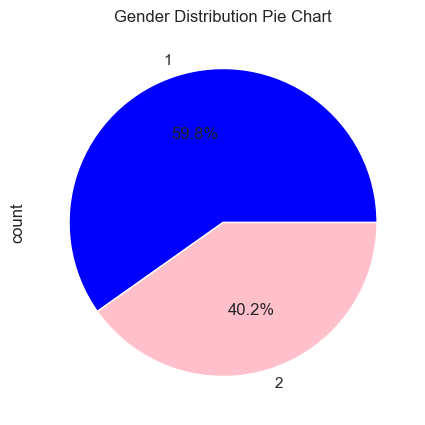

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=dataset, hue='Gender', palette='coolwarm', legend=False)
plt.title("Gender Distribution")
plt.show()

dataset['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title("Gender Distribution Pie Chart")
plt.show()

### Conclusion:
From the **Gender Distribution** bar chart and pie chart:
- There are **more males (59.8%) than females (40.2%)** in the dataset.
- The gender imbalance may affect further analysis and model predictions, depending on the research focus.

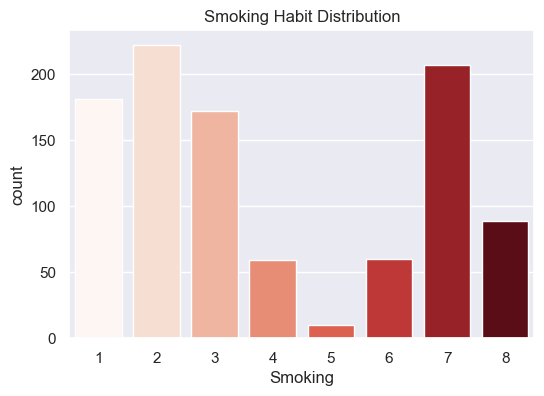

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Smoking', data=dataset, hue='Smoking', palette='Reds', legend=False)
plt.title("Smoking Habit Distribution")
plt.show()

### **Conclusion from Smoking Habit Distribution:**
1. **Most individuals fall within low-to-moderate smoking levels (1, 2, and 3).**  
2. **Higher smoking levels (7 and 8) are also significant**, indicating a portion of the dataset consists of heavy smokers.  
3. **Very few individuals fall under level 5**, making it an outlier compared to other smoking levels.  
4. **Understanding smoking habits is important**, as high smoking levels are strongly associated with respiratory issues, which might be relevant to the dataset's purpose.

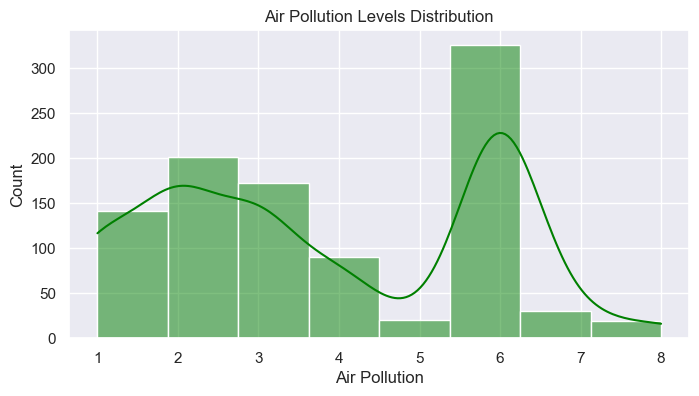

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(dataset['Air Pollution'], bins=8, kde=True, color='green')
plt.title("Air Pollution Levels Distribution")
plt.show()

### Conclusion:
From the **Air Pollution Levels Distribution** histogram:
- The distribution is somewhat **bimodal**, with peaks around **levels 2 and 6**.
- A significant number of individuals are exposed to moderate (level 2-3) and high (level 6) air pollution.
- Very few individuals fall into the extreme low (level 5) or high (level 7-8) pollution categories.
- This indicates that air pollution exposure is not uniform across the population, which may have implications for health-related analysis.

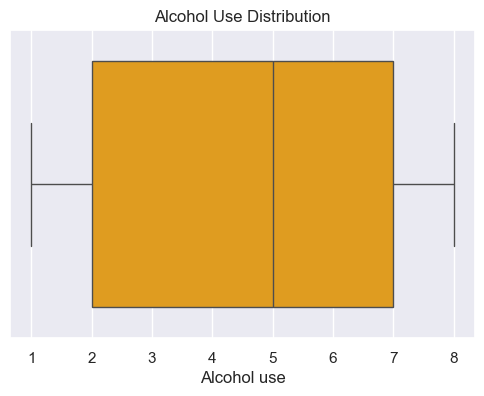

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=dataset['Alcohol use'], color='orange')
plt.title("Alcohol Use Distribution")
plt.show()

### **Conclusion: Alcohol Use Distribution**  
- The **box plot** indicates that the **median alcohol use score** is around **5 or 6**, meaning that many individuals in the dataset have a moderate level of alcohol consumption.  
- The **interquartile range (IQR)** (the box) spans from **approximately 2 to 7**, suggesting that **most individuals fall within this range of alcohol use**.  
- The **whiskers** show that there are some **individuals with very low (1) or very high (8) alcohol use**. However, no significant **outliers** are observed in this distribution.  
- This distribution suggests that there is **a mix of low, moderate, and high alcohol consumption levels** among individuals in the dataset.

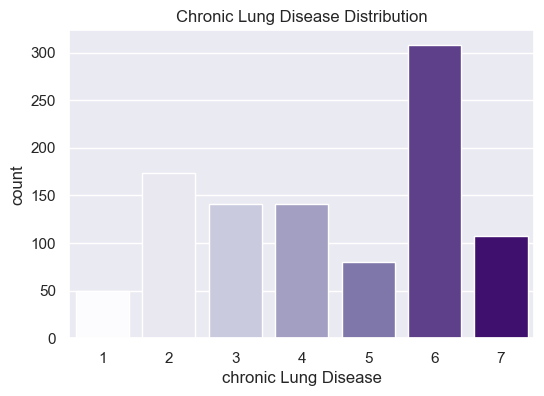

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='chronic Lung Disease', data=dataset, palette='Purples', hue='chronic Lung Disease', legend=False)
plt.title("Chronic Lung Disease Distribution")
plt.show()

### **Conclusion: Chronic Lung Disease Distribution**  
- The **highest count** of individuals in the dataset have a chronic lung disease severity level of **6**.  
- The **least common severity levels** are **1 and 5**, indicating fewer people in the dataset with either very low or moderate levels of chronic lung disease.  
- Levels **2, 3, and 4** have similar frequencies, showing a relatively **balanced distribution** of individuals with mild to moderate conditions.  
- The data suggests that **severe cases (level 6) are significantly more frequent than mild cases (level 1)**.  
- This distribution may indicate a **potential correlation between chronic lung disease and other health factors**, which could be explored further.

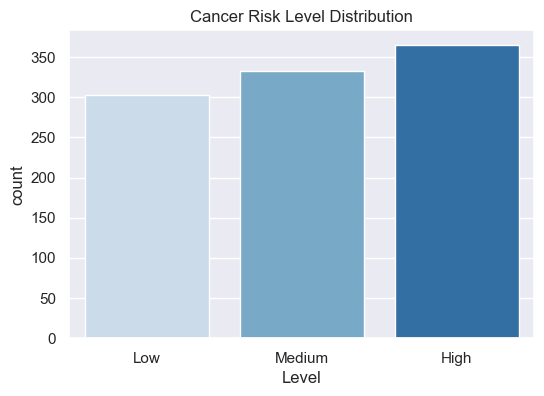

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Level', data=dataset, palette='Blues', hue='Level', legend=False)
plt.title("Cancer Risk Level Distribution")
plt.show()

### **Conclusion: Cancer Risk Level Distribution**
- The dataset shows **three levels of cancer risk**: **Low, Medium, and High**.
- The **High-risk category** has the highest number of individuals, indicating a significant portion of the dataset may be at an increased risk of cancer.
- The **Medium-risk category** follows closely, suggesting that many individuals fall into an intermediate risk zone.
- The **Low-risk category** has the lowest count, implying that fewer individuals in the dataset have a minimal cancer risk.
- The overall distribution suggests a **higher prevalence of medium-to-high cancer risk cases**, which may warrant further investigation into the contributing factors, such as smoking, pollution, or genetic predisposition.

# **Bivariate Analysis**  

#### **1. Smoking vs. Cancer Risk Level**  
- **Why?** Smoking is a well-known risk factor for cancer, so analyzing its relationship with cancer risk levels is crucial.  
- **Analysis:**  
  - Use a **boxplot** or **barplot** to compare cancer risk levels across smoking categories.  
  - A higher frequency of **High-risk** individuals in the "Smoking" category would indicate a strong association.  

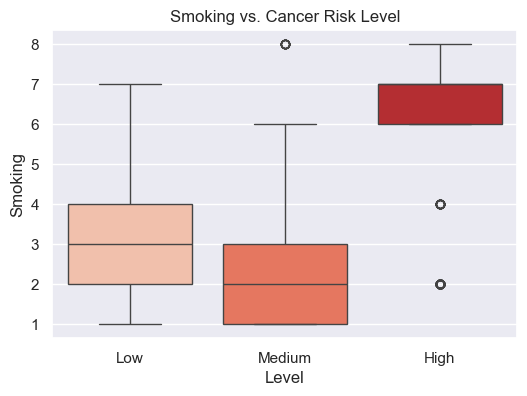

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Level', y='Smoking', data=dataset, hue='Level', dodge=False, palette='Reds')
plt.title("Smoking vs. Cancer Risk Level")
plt.legend([], [], frameon=False)  # Hides redundant legend
plt.show()

### **Conclusion from the Boxplot**
- There is a clear **positive association** between **Smoking levels and Cancer Risk Level**.
- Individuals in the **High-risk** category tend to have higher smoking levels, as indicated by the higher median and upper quartile.
- The **Low and Medium risk** categories have a wider range of smoking levels, suggesting variability in other contributing factors.
- Some **outliers** in the **Medium-risk group** indicate individuals with very high smoking levels who are not classified as "High-risk," possibly due to other protective factors like a balanced diet or genetics.

#### **2. Air Pollution vs. Chronic Lung Disease**  
- **Why?** Long-term exposure to air pollution is a major contributor to lung diseases, including chronic lung disease.  
- **Analysis:**  
  - Use a **scatter plot** or **bar chart** to visualize how chronic lung disease varies with air pollution levels.  
  - A positive correlation would indicate that higher pollution levels increase the chances of chronic lung disease.  

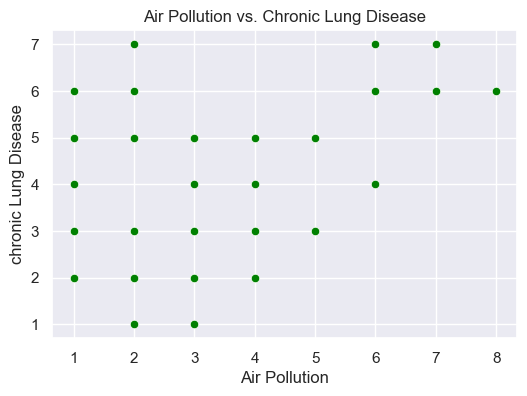

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Air Pollution', y='chronic Lung Disease', data=dataset, color='green')
plt.title("Air Pollution vs. Chronic Lung Disease")
plt.show()

### **Conclusion from the Scatter Plot**
- The scatter plot suggests a **positive correlation** between **Air Pollution levels and Chronic Lung Disease**.
- As **Air Pollution increases**, there is a tendency for **higher levels of Chronic Lung Disease**.
- The points are somewhat dispersed, indicating **some variability**, meaning other factors (like smoking, occupational hazards, or genetic risk) might also play a role in chronic lung disease development.
- Higher levels of **Air Pollution (6-8)** seem to be associated with more severe cases of **Chronic Lung Disease (5-7)**.
- However, some individuals with **low Air Pollution exposure** still experience chronic lung disease, suggesting **other contributing factors**.

### **3. Gender vs. Cancer Risk Level**

<Axes: xlabel='Level', ylabel='Gender'>

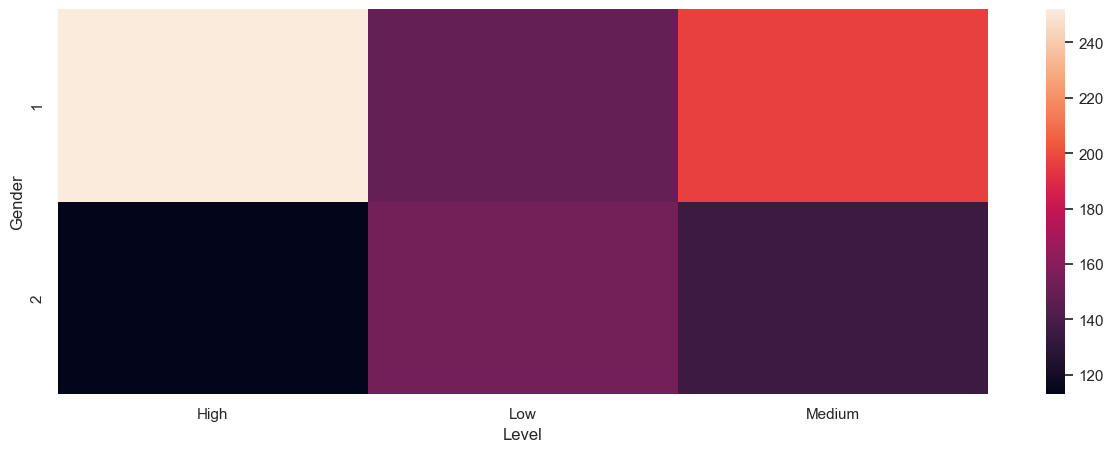

In [21]:
sns.heatmap(pd.crosstab(dataset['Gender'],dataset['Level']))

#### **Conclusion from the Heatmap Analysis:**  
1. **Gender Differences in Cancer Risk Levels:**  
   - The heatmap indicates that **Gender 1 (possibly male)** has **higher counts** in the "High" and "Medium" cancer risk levels compared to Gender 2.  
   - Gender 2 (possibly female) has lower values, especially in the "High" risk category.

2. **Low-Risk Category Distribution:**  
   - Both genders have a somewhat similar distribution in the "Low" risk category, but Gender 1 still appears to have higher absolute values.

3. **Possible Implications:**  
   - The data suggests that **Gender 1 is more prone to higher cancer risk levels**, possibly due to lifestyle factors like smoking, diet, or environmental exposure.  
   - Gender 2 has **fewer high-risk cases**, which could be due to protective biological factors or different lifestyle choices.

### **Key Takeaways:**  
- **Cancer risk varies between genders, with one gender being more susceptible to higher risk levels.**  

# **Multivariate Analysis**  
Multivariate analysis examines the relationships between multiple variables.  

#### **1. Smoking, Passive Smoker, and Cancer Risk Level**  
- **Why?** Both active smoking and passive smoking contribute to cancer risk, but the combined effect should be analyzed.  
- **Analysis:**  
  - Use a **heatmap** or **pairplot** to visualize their combined impact on cancer risk.  
  - Check if passive smokers also have a high probability of being in the "High-risk" category.  

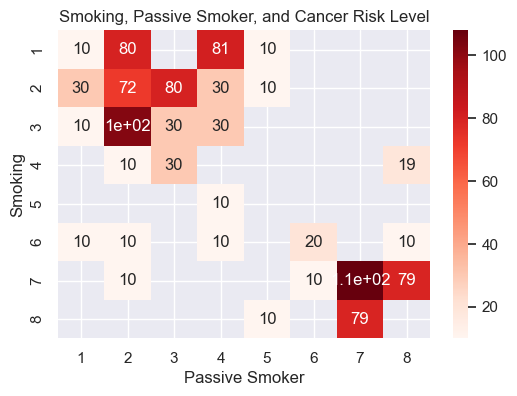

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(dataset.pivot_table(index='Smoking', columns='Passive Smoker', values='Level', aggfunc='count'), cmap='Reds', annot=True)
plt.title("Smoking, Passive Smoker, and Cancer Risk Level")
plt.show()

### **Conclusion from the Heatmap Analysis**

1. **Higher Cancer Risk for Active Smokers & Passive Smokers:**  
   - The darkest red regions indicate that individuals who **both smoke and are exposed to passive smoking** have the highest cancer risk levels.  
   - For example, at `(Smoking=3, Passive Smoker=3)`, the value is **100**, suggesting a strong association between heavy smoking and passive smoking in increasing cancer risk.

2. **Moderate Risk for Either Smoking or Passive Smoking:**  
   - There are some medium-intensity red regions where individuals who either **smoke or are exposed to passive smoking** have a moderate cancer risk.
   - For example, `(Smoking=2, Passive Smoker=3)` and `(Smoking=1, Passive Smoker=2)` show values around **70-80**, indicating an increased risk even for passive smokers.

3. **Low Risk for Non-Smokers & No Passive Smoking Exposure:**  
   - Lighter-colored cells (low values) indicate that people **with little to no exposure to smoking (active or passive) have a significantly lower cancer risk**.

### **Key Insights**
- Active and passive smoking together amplify cancer risk. 
- Even passive smoking alone is associated with an increased cancer risk.

# Data Preprocessing

#### Droping the columns 'index' and 'Patient Id' because they are irrelevent for predictive analysis. 

In [4]:
print(dataset.columns)

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [5]:
dataset=dataset.drop(['index','Patient Id'],axis=1)

In [6]:
dataset.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

### One Hot Encoding of genders

***Handling Categories***

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Convert numeric gender values to categorical labels
dataset['Gender'] = dataset['Gender'].map({1: 'Male', 2: 'Female'})

# Initialize the encoder without dropping any categories
ohe = OneHotEncoder(drop=None, sparse_output=False)  # Convert to dense array

# Fit and transform the 'Gender' column
gender_encoded = ohe.fit_transform(dataset[['Gender']])

# Get the column names from the encoder
gender_columns = ohe.get_feature_names_out(['Gender'])

# Convert the encoded array to a DataFrame with appropriate column names
gender_encoded_df = pd.DataFrame(gender_encoded, columns=gender_columns)

# Concatenate the encoded DataFrame with the original dataset, dropping the original 'Gender' column
dataset = pd.concat([dataset.drop('Gender', axis=1), gender_encoded_df], axis=1)

# Display the result
dataset.head()

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Gender_Female,Gender_Male
0,33,2,4,5,4,3,2,2,4,3,...,2,2,3,1,2,3,4,Low,0.0,1.0
1,17,3,1,5,3,4,2,2,2,2,...,7,8,6,2,1,7,2,Medium,0.0,1.0
2,35,4,5,6,5,5,4,6,7,2,...,9,2,1,4,6,7,2,High,0.0,1.0
3,37,7,7,7,7,6,7,7,7,7,...,3,1,4,5,6,7,5,High,0.0,1.0
4,46,6,8,7,7,7,6,7,7,8,...,4,1,4,2,4,2,3,High,0.0,1.0


In [8]:
dataset['Gender_Male']=dataset['Gender_Male'].astype(int)
dataset['Gender_Female']=dataset['Gender_Female'].astype(int)

### Label Encoding for Level (Manually Ordinal)

In [9]:
dataset.loc[dataset['Level']=='Low','Level']=1
dataset.loc[dataset['Level']=='Medium','Level']=2
dataset.loc[dataset['Level']=='High','Level']=3

In [10]:
dataset['Level']=dataset['Level'].astype(int)

In [11]:
dataset.sample(5)

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Gender_Female,Gender_Male
247,65,6,8,7,7,7,6,2,4,1,...,6,5,1,9,3,4,2,2,0,1
472,33,6,7,7,7,7,6,7,7,4,...,5,6,5,5,4,6,5,3,0,1
250,33,6,7,7,7,7,6,7,7,4,...,5,6,5,5,4,6,5,3,0,1
711,42,2,1,2,3,4,3,2,1,1,...,1,2,1,2,3,1,2,1,0,1
275,35,2,1,2,1,2,1,2,3,2,...,5,1,3,2,1,2,2,1,1,0


### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.drop('Level',axis=1),dataset['Level'],test_size=0.2,random_state=0)

In [13]:
x_train.shape,x_test.shape

((800, 24), (200, 24))

### Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [15]:
scaler.mean_

array([37.33875,  3.89125,  4.64375,  5.22625,  4.88625,  4.61875,
        4.41   ,  4.495  ,  4.4575 ,  3.945  ,  4.17625,  4.44375,
        4.875  ,  3.82375,  3.845  ,  4.27   ,  3.76   ,  3.68125,
        3.9875 ,  3.54   ,  3.88875,  2.93625,  0.40375,  0.59625])

In [16]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [17]:
np.round(x_train.describe())

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Gender_Female,Gender_Male
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,37.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,0.0,1.0
std,12.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0
min,14.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
25%,28.0,2.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0
50%,36.0,3.0,5.0,6.0,5.0,5.0,5.0,4.0,4.0,3.0,...,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,1.0
75%,45.0,6.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,...,6.0,6.0,5.0,5.0,5.0,5.0,6.0,4.0,1.0,1.0
max,73.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,8.0,...,8.0,9.0,8.0,8.0,9.0,7.0,7.0,7.0,1.0,1.0


In [18]:
np.round(x_train_scaled.describe())

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Gender_Female,Gender_Male
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,...,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
max,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0


### Model Training

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

In [21]:
for name,model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test_scaled)

    print(f"{name} with accuracy : {accuracy_score(y_test,y_pred)}")

Logistic Regression with accuracy : 1.0
Naive Bayes with accuracy : 0.875
Support Vector Machine with accuracy : 1.0
K-Nearest Neighbors with accuracy : 1.0
Decision Tree with accuracy : 1.0
Random Forest with accuracy : 1.0
Bagging with accuracy : 1.0


C:\Users\projj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost with accuracy : 0.665
Gradient Boosting with accuracy : 1.0
Extra Trees with accuracy : 1.0


In [22]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

## Saving Models

In [23]:
import joblib

# Save OneHotEncoder
joblib.dump(ohe, 'lung_cancer_onehot_encoder.pkl')

# Save StandardScaler
joblib.dump(scaler, 'lung_cancer_standard_scaler.pkl')

# Save model
joblib.dump(knn, 'lung_cancer_KNN_model.pkl')

print("Everything saved successfully!")

Everything saved successfully!


In [24]:
for column in x_train.columns:
  print(column)

Age
Air Pollution
Alcohol use
Dust Allergy
OccuPational Hazards
Genetic Risk
chronic Lung Disease
Balanced Diet
Obesity
Smoking
Passive Smoker
Chest Pain
Coughing of Blood
Fatigue
Weight Loss
Shortness of Breath
Wheezing
Swallowing Difficulty
Clubbing of Finger Nails
Frequent Cold
Dry Cough
Snoring
Gender_Female
Gender_Male


## Predictive System

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Load trained models and preprocessors
knn_model = joblib.load("lung_cancer_KNN_model.pkl")  # KNN Model
scaler = joblib.load("lung_cancer_standard_scaler.pkl")  # StandardScaler
ohe = joblib.load("lung_cancer_onehot_encoder.pkl")  # OneHotEncoder

# Corrected input_data (23 values)
input_data = (45, 'Male', 5, 2, 6, 3, 4, 2, 5, 3, 4, 3, 6, 2, 2, 5, 6, 3, 2, 4, 3, 2, 2) 

# Column names 
columns = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
           'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker',
           'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
           'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']

# Convert input to DataFrame
input_df = pd.DataFrame([input_data], columns=columns)

# Apply OneHotEncoding to 'Gender' column
gender_encoded = ohe.transform(input_df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

# Drop original 'Gender' column and concatenate one-hot encoded data
input_df = pd.concat([input_df.drop('Gender', axis=1), gender_encoded_df], axis=1)

# Ensure final column names match training set before scaling
expected_columns = scaler.feature_names_in_  # Get feature names used during training
input_df = input_df.reindex(columns=expected_columns, fill_value=0)  # Fill missing values with 0

# Apply StandardScaler transformation
input_scaled = scaler.transform(input_df)

# Make prediction using trained KNN model
prediction = knn_model.predict(input_scaled)

# Map prediction to Lung Cancer Risk Level
stage_mapping = {1: "Low", 2: "Medium", 3: "High"}
predicted_stage = stage_mapping.get(prediction[0], "Unknown")

# Output result
if predicted_stage == "Low":
    print("The model predicts the Lung Cancer Stage as Low Risk.")
elif predicted_stage == "Medium":
    print("The model predicts the Lung Cancer Stage as Medium Risk.")
else:
    print("The model predicts the Lung Cancer Stage as High Risk.")

The model predicts the Lung Cancer Stage as Medium Risk.
